In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from os import listdir
from scipy.fftpack import ifft

In [3]:
def parse_for_python(data_path):
    for file in listdir(data_path):
        if file.split('.')[1] == 'dat':
            with open(data_path + file, 'r') as src:
                with open(data_path + file.split('.')[0] + '.npy', 'w') as dst:
                    while True:
                        line = src.readline()
                        if line == '':
                            break
                        if line[-2] == ',':
                            dst.write(line[:-2] + '\n')
                        else:
                            dst.write(line)
                
parse_for_python('data/')

In [4]:
# load data from a data file into matrix
mat = np.loadtxt('data/1-10.npy', comments='%', delimiter=',')

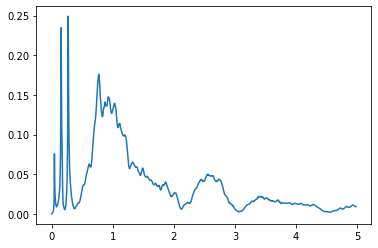

In [5]:
# plot raw data (linmag, S21)
mat = mat.transpose()
x, y = mat[0], mat[1]
plt.plot(x/1e9, y)

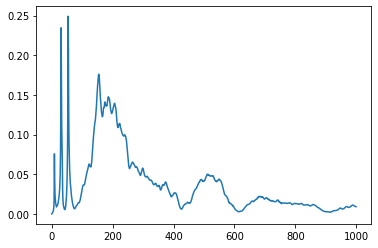

In [6]:
# now we plot it without frequency on x axis
plt.plot(y)

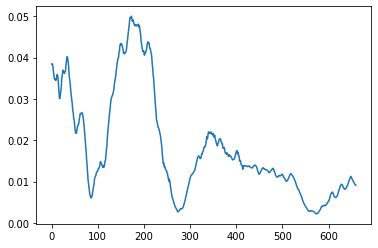

In [7]:
# then we discard low frequencies where scattering is too high
plt.plot(y[340:])

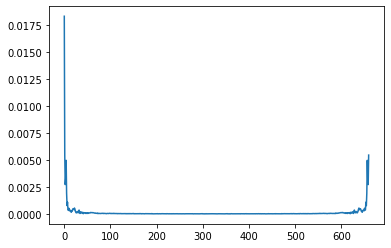

In [8]:
# next, we transform this signal using ifft
plt.plot(np.abs(ifft(y[340:])))